In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import scale, MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# resample signal to n samples
from scipy.signal import resample

# XML parser
import xml.etree.ElementTree as ET

# encoding and normalizing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

NUM_POINTS = 50

In [29]:
gestures = ['rectangle', 'delete_mark', 'pigtail']
data = []
labels = []

for root, subdirs, files in os.walk('dataset/xml_logs'):
    if 'ipynb_checkpoint' in root:
        continue
        
    if len(files) > 0:
        for f in files:
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                    
                xml_root = ET.parse(f'{root}/{f}').getroot()
                    
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                        
                points = np.array(points, dtype=float)
                    
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                    
                #resampled = resample(points, 64)
                    
                if not label in labels and label in gestures:
                    data.append((label, points))
                    labels.append(label)

                if len(labels) == len(gestures):
                    print("all files loaded successfully", len(data))
                    break

print("all files loaded successfully", len(data))


all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all files loaded successfully 3
all file

In [30]:
labels = [sample[0] for sample in data]
print(set(labels))

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

print(set(labels_encoded))
y = to_categorical(labels_encoded)
print(len(y[0]))

sequences = [sample[1] for sample in data]
X = np.array(sequences)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

{'rectangle', 'delete_mark', 'pigtail'}
{0, 1, 2}
3
(2,) (1,) (2, 3) (1, 3)


C:\Users\sinas\AppData\Local\Temp\ipykernel_23280\3808467487.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(sequences)


In [4]:
def add_noise(sequence):
    noise = np.random.normal(0,0.08,sequence.shape)
    noise_seq = sequence + noise
    return noise_seq

In [26]:
def scaling(sequence):
    centroid = np.mean(sequence)
    rnd_x = np.random.uniform(0.8, 1.2)
    rnd_y = np.random.uniform(0.8, 1.2)
    points = sequence - centroid
    scaled_seq=[]
    for x, y in points:
        scaled_x = x*rnd_x
        scaled_y = y*rnd_y 
        scaled_seq.append([scaled_x,scaled_y])
    scaled_seq += centroid
    return scaled_seq

In [32]:
def spatial_resampling(sequence):
    resampled_seq = resample(sequence, np.random.randint(5, len(sequence)*2))
    return resampled_seq

In [78]:
from scipy.spatial.transform import Rotation as R

def perspective_change(sequence):
    persp_seq = []
    centroid = np.mean(sequence)
    angle = np.random.uniform(-30, 30)
    r = R.from_euler('yx', [angle, angle], degrees=True)
    sequence = sequence - centroid
    for point in sequence:
        point=np.append(point, 1)
        new_point = np.array(r.as_matrix() @ point)
        persp_seq.append(new_point[:-1]) 
    persp_seq += centroid
    return persp_seq

[[-2.06881753  0.74078248]
 [-1.76806765  0.8025606 ]
 [-1.76671698  0.86283697]]
scale  0.9988076592257678 1.0657243315754061
seq  [[-1.961446    0.86252153]
 [-1.85357075  0.8966647 ]
 [-1.78165392  0.93080787]
 [-1.67377867  0.8966647 ]
 [-1.60186184  0.8966647 ]]
scaled  [[-1.95910729  0.91921018]
 [-1.85136067  0.95559739]
 [-1.77952958  0.9919846 ]
 [-1.67178296  0.95559739]
 [-1.59995187  0.95559739]]
new_Seq [[-2.05219292  0.93844612]
 [-1.94486625  0.97351003]
 [-1.87331514  1.00820916]
 [-1.76598848  0.97533399]
 [-1.69443737  0.97606358]]


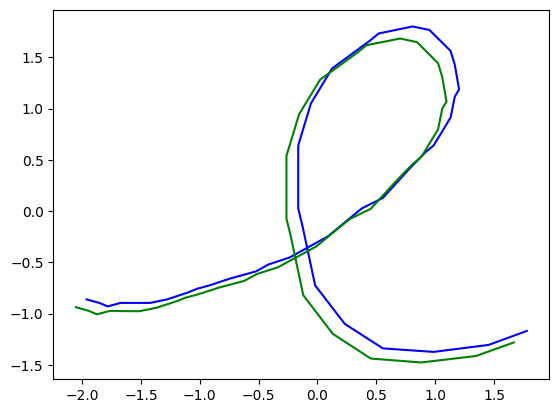

In [79]:
test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]

noise_seq = add_noise(sequence)
scaled_seq = scaling(sequence)
resampled_seq = spatial_resampling(sequence)
persp_seq = perspective_change(sequence)

plt.plot(sequence.T[0], sequence.T[1]*-1, 'b')
plt.plot(persp_seq.T[0], persp_seq.T[1]*-1, 'g')
